In [ ]:
import tensorflow as tf
import os
import numpy as np
import warnings
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/pnuemonia_dataset/'
target_var = os.listdir(data_dir)
target_var

['normal', 'pnuemonia']

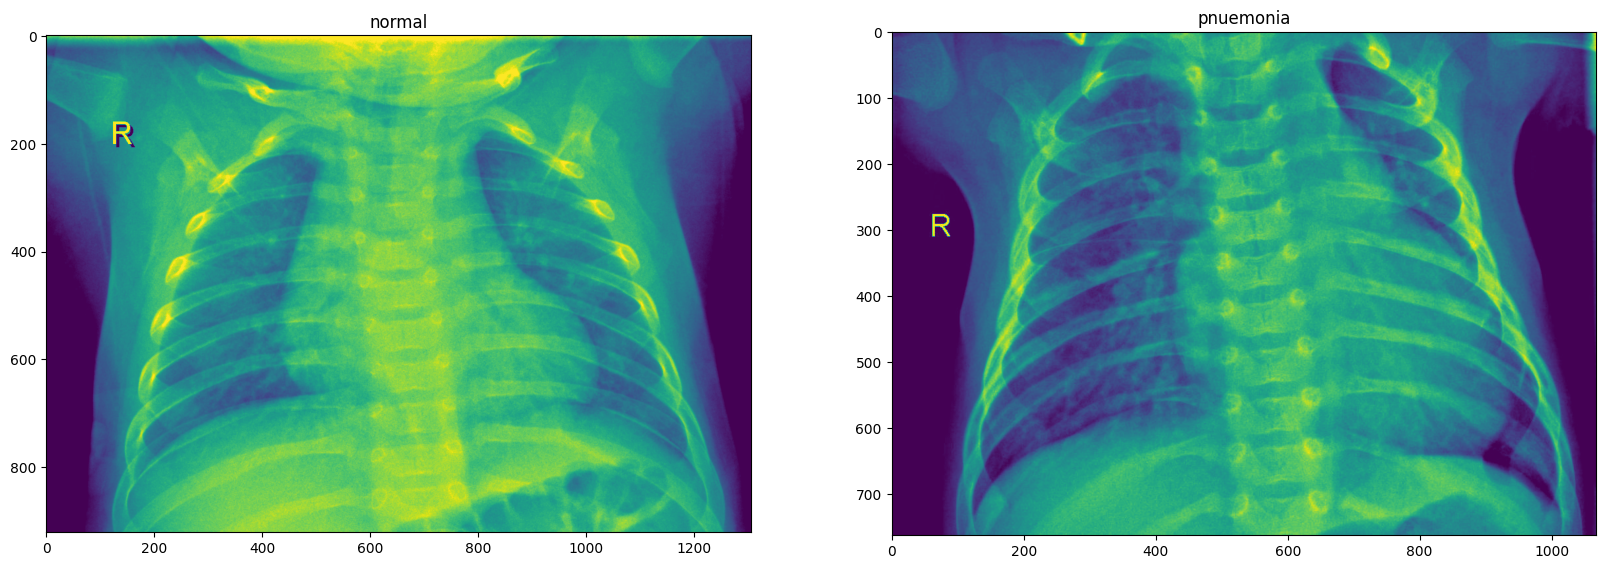

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))
for i in range(len(target_var)):
    d = data_dir+target_var[i]+'/'+os.listdir(data_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 5216 files belonging to 2 classes.


In [ ]:
batch_size = 32
len(data)

163

In [ ]:
train_size = int(len(data)* .7)
valid_size = int(len(data)* .2)
test_size = int(len(data)* .1) + 1
train_size + valid_size + test_size

163

In [ ]:
train = data.take(train_size)
valid = data.skip(train_size).take(valid_size)
test = data.skip(train_size).skip(valid_size).take(test_size)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [ ]:
pnuemonia_model = tf.keras.Sequential([
    layers.Input(shape=(256, 256, 3)),
])

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
pnuemonia_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
pnuemonia_model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
hist = pnuemonia_model.fit(
    train,
    validation_data=valid,
    epochs=7)

Epoch 1/7
114/114 [==============================] - 510s 4s/step - loss: 1.7881 - accuracy: 0.8876 - val_loss: 0.0967 - val_accuracy: 0.9668
Epoch 2/7
114/114 [==============================] - 304s 3s/step - loss: 0.1479 - accuracy: 0.9465 - val_loss: 0.1046 - val_accuracy: 0.9609
Epoch 3/7
114/114 [==============================] - 294s 3s/step - loss: 0.1219 - accuracy: 0.9534 - val_loss: 0.0982 - val_accuracy: 0.9678
Epoch 4/7
114/114 [==============================] - 302s 3s/step - loss: 0.0570 - accuracy: 0.9775 - val_loss: 0.1112 - val_accuracy: 0.9629
Epoch 5/7
114/114 [==============================] - 307s 3s/step - loss: 0.0461 - accuracy: 0.9816 - val_loss: 0.1278 - val_accuracy: 0.9590
Epoch 6/7
114/114 [==============================] - 330s 3s/step - loss: 0.0410 - accuracy: 0.9852 - val_loss: 0.1566 - val_accuracy: 0.9492
Epoch 7/7
114/114 [==============================] - 311s 3s/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0970 - val_accuracy: 0.9727


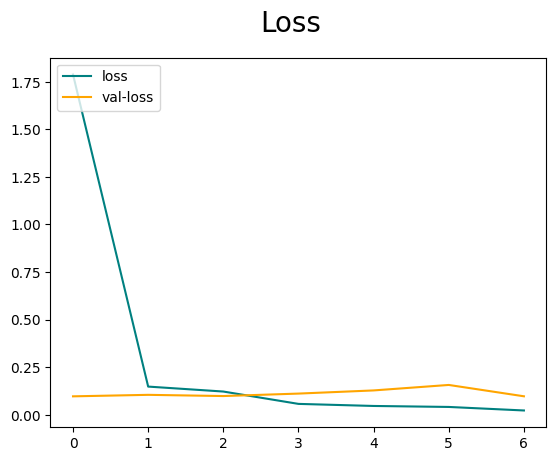

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val-loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = pnuemonia_model.predict(x)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 [==============================] - 1s 875ms/step


In [ ]:
print(f'Accuracy: {accuracy.result().numpy()}, Precision:{precision.result().numpy()}, Recall: {recall.result().numpy()}')

Accuracy: 0.9761029481887817, Precision:0.9820512533187866, Recall: 0.9845758080482483


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

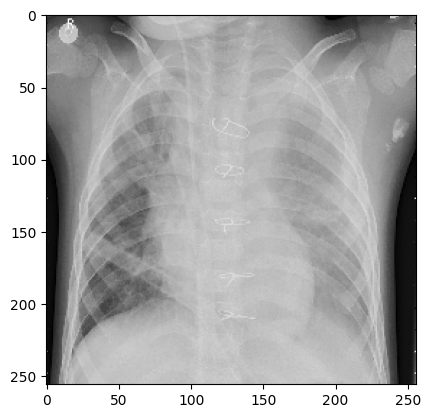

In [ ]:
img_path = '/content/drive/MyDrive/pnuemonia_dataset/pnuemonia/person3_bacteria_10.jpeg'
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
plt.imshow(img)
plt.show()

In [ ]:
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
img_array = preprocess_input(img_array)

In [ ]:
pred = pnuemonia_model.predict(img_array)
pred

1/1 [==============================] - 0s 58ms/step


array([[0.42362177]], dtype=float32)

In [ ]:
if predictions < 0.5:
  print("Predicted as normal")
else:
  print("Predicted as covid")

Predicted as covid


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
pnuemonia_model.save('drive/MyDrive/trainedModels/pnuemoniaModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pnuemonia_model.save('drive/MyDrive/trainedModels/pnuemoniaModel.keras')

In [ ]:
new_model = load_model('drive/MyDrive/trainedModels/pnuemoniaModel.h5')

In [ ]:
pred = new_model.predict(img_array)
pred

1/1 [==============================] - 0s 109ms/step


array([[0.6427743]], dtype=float32)